In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## implementing ADAM algorithm

In [4]:
## road map :
# 1- implement all for single variable 
# 2- implemnt for multivariable


In [5]:
x = np.arange(20).reshape(20,1)
a = -1; b = 2
y = a*x + b 

In [6]:
# 1- momentum based GD Batch and single variable if we want multi we get n of features and change the dimes to n,1
def MBGD(x,y, alpha, gamma, epoches = 1000):
    m = x.shape[0]
    theta = np.array([0,0]).reshape(2,1)
    theta0_hist = []
    theta1_hist = []
    cost_hist = []
    moment = np.array([0,0]).reshape(2,1)
    x = np.column_stack((np.ones_like(x), x))
    c = 0
    for i in range(epoches):
        # theta vector gradient section
        grad_j_theta = (1/m) * np.sum(((x @ theta)-y) * x, axis=0 ).reshape(2,1) 
        cost = (1/(2*m)) * np.sum(np.square((x @ theta) -y)) 
        moment = gamma * moment + alpha* grad_j_theta
        theta = theta - moment # update step

        # adding the results of the epoch
        # if c == 1:
        #     print(theta[1][0])
        # c += 1
        theta0_hist.append(theta[0][0])
        theta1_hist.append(theta[1][0])
        cost_hist.append(cost)
        if i > 1:
            if abs(cost - cost_hist[-2]) < .001:
                
                print(cost_hist[-2])
                print(cost)
                print(i)
                break
            elif grad_j_theta.T @ grad_j_theta < .1:
                print('grad')
                print(i)
                break 
        
    # return results to user
    return theta0_hist, theta1_hist, cost_hist


In [7]:
t0, t1, j = MBGD(x,y,.001,.1)
# t0

0.5649128216311716
0.5640303265567198
34


In [8]:
j[-10:-1]

[0.5891660558054987,
 0.5826436142771536,
 0.5777385346379152,
 0.5740280632484459,
 0.5711999614029825,
 0.5690236148531159,
 0.567328695791588,
 0.5659894029550792,
 0.5649128216311716]

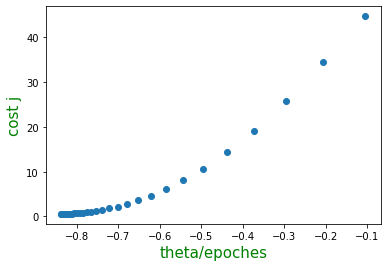

In [9]:
fig, ax = plt.subplots()
ax.plot(t1, j, linestyle = 'none', marker = 'o')
# ax2 = ax.twiny()
# ax2.plot(t0, j, color = 'r', linestyle = 'none', marker= 'x')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15});

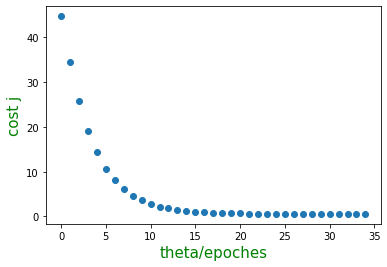

In [10]:
fig, ax = plt.subplots()
ax.plot(range(len(j)), j, linestyle = 'none', marker = 'o')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15});

0.5640303265567198


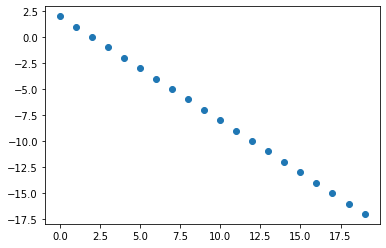

In [11]:
plt.scatter(x,y)
print(j[-1])

In [12]:
from sklearn.metrics import r2_score
model = lambda t0, t1,x : t0 + t1 * x
y_pred = model(t0[-1], t1[-1], x)
r2_score(y,y_pred)

0.9661178206168866

In [13]:
# 1- momentum based GD Batch and single variable if we want multi we get n of features and change the dimes to n,1
def MBGD_multi(x,y, alpha = .001, gamma = .0001, epoches = 1000):
    m = x.shape[0]
    n = x.shape[1]
    theta = np.zeros((n+1,1))
    theta_hist = []
    # theta1_hist = []
    cost_hist = []
    moment = np.zeros((n+1,1))
    x = np.column_stack((np.ones((m,1)), x))
    y = y.reshape(m,1)
    # print(x.shape)
    # print(theta.shape)
    c = 2
    # print(moment)
    for i in range(epoches):
        # theta vector gradient section
        # print(((x @ theta)-y).shape)
        # grad_j_theta = (1/m) * (x.T @ ((x @ theta)-y))  #).reshape(n+1,1)
        grad_j_theta = (1/m) * np.sum(((x @ theta)-y) * x, axis=0 ).reshape(n+1,1) 
        
        cost = 1/(2*m) * np.sum(np.square((x @ theta) -y)) 
        moment = gamma * moment + alpha* grad_j_theta
        theta = theta - moment # update step
        # print(moment)
        # break
        #adding the results of the epoch
        if c == 1 or c == 0:
            print(moment)
        c += 1
        theta_hist.append(theta)
        # theta1_hist.append(theta[1][0])
        cost_hist.append(cost)
        if i > 1:
            if abs(cost - cost_hist[-2]) < .0001:
                print('cost')
                print(cost_hist[-2])
                print(cost)
                print(i)
                break
            else:
                try:
                    if np.square(np.linalg.norm(grad_j_theta, ord= 2)) < 10:
                        
                        print('grad')
                        print(i)
                        break
                    # else:
                    #     print('##########')
                    #     print('moment is: ',moment)
                    #     print('cosst is:',cost)
                    #     print('gradient is:',grad_j_theta)
                except:
                    # print('***************')
                    # print('moment is: ',moment)
                    # print('cosst is:',cost)
                    # print('gradient is:',grad_j_theta)
                    pass 
        
    # return results to user
    print('final cost is:',cost)
    return theta_hist, cost_hist


In [14]:
def train(x,y,func , alpha= .1, beta =.01, gamma= .01):
    pass

In [211]:
multival_data = np.genfromtxt('MultipleLR.csv',delimiter=',')
x_multi =  multival_data[:,:-1]
y_multi = multival_data[:,-1]

In [16]:
t,j = MBGD_multi(x_multi,y_multi, alpha=.0001, gamma=.00001)

grad
619
final cost is: 3.350128203610418


In [17]:
t0 = [x[0] for x in t]
t1 = [x[1] for x in t]
t2 = [x[2] for x in t]
t3 = [x[3] for x in t]

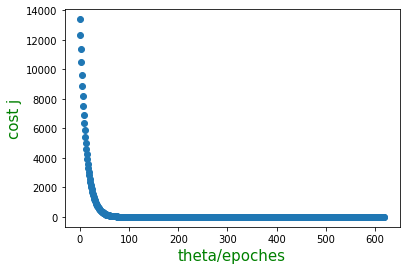

In [18]:
fig, ax = plt.subplots()
ax.plot(range(len(j)), j, linestyle = 'none', marker = 'o')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15});

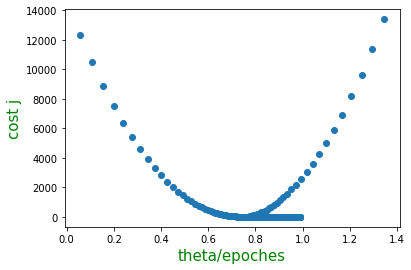

In [19]:
fig, ax = plt.subplots()
ax.plot(t3, j, linestyle = 'none', marker = 'o')
# ax2 = ax.twiny()
# ax2.plot(t0, j, color = 'r', linestyle = 'none', marker= 'x')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15});

In [21]:
x = np.column_stack((np.ones((25,1)), x_multi))
model = lambda t,x : t0 + t1 * x
y_pred = x @ t[-1]
r2_score(y_multi,y_pred)

0.9879310307712268

In [136]:
# 1- RMS prop GD Batch and single variable if we want multi we get n of features and change the dimes to n,1
def RMS(x,y, alpha = .001, beta = .01, epsilon = .00000000000000000000001, epoches = 1000):
    m = x.shape[0]
    n = x.shape[1]
    theta = np.zeros((n+1,1))
    theta_hist = []
    # theta1_hist = []
    cost_hist = []
    vt = np.zeros((n+1,1))
    x = np.column_stack((np.ones((m,1)), x))
    y = y.reshape(m,1)
    # print(x.shape)
    # print(theta.shape)
    c = 2
    # print(moment)
    for i in range(epoches):
        # theta vector gradient section
        # print(((x @ theta)-y).shape)
        # grad_j_theta = (1/m) * (x.T @ ((x @ theta)-y))  #).reshape(n+1,1)
        grad_j_theta = (1/m) * np.sum(((x @ theta)-y) * x, axis=0 ).reshape(n+1,1) 
        
        cost = 1/(2*m) * np.sum(np.square((x @ theta) -y)) 
        vt = beta * vt + (1-beta)* (grad_j_theta **2)
        theta = theta - (alpha/(np.sqrt(vt) + epsilon)) * grad_j_theta # update step
        # print(moment)
        # break
        #adding the results of the epoch
        if c == 1 or c == 0:
            print(vt)
        c += 1
        theta_hist.append(theta)
        # theta1_hist.append(theta[1][0])
        cost_hist.append(cost)
        if i > 1:
            if abs(cost - cost_hist[-2]) < .001:
                print('cost')
                print(cost_hist[-2])
                print(cost)
                print(i)
                break
            else:
                try:
                    if np.square(np.linalg.norm(grad_j_theta, ord= 2)) < 5:
                        
                        print('grad')
                        print(i)
                        break
                    # else:
                    #     print('##########')
                    #     print('moment is: ',moment)
                    #     print('cosst is:',cost)
                    #     print('gradient is:',grad_j_theta)
                except:
                    # print('***************')
                    # print('moment is: ',moment)
                    # print('cosst is:',cost)
                    # print('gradient is:',grad_j_theta)
                    pass 
        
    # return results to user
    print('final cost is:',cost)
    return theta_hist, cost_hist


In [151]:
from sklearn.linear_model import LinearRegression as lr 
model = lr()
model.fit(x_multi, y_multi)
model.coef_

array([0.35593822, 0.54251876, 1.16744422])

In [152]:
model.intercept_
# model.score(x_multi, y_multi)

-4.3361024012403675

In [155]:
t3[-1]

array([0.70774798])

In [148]:
t,j = RMS(x_multi,y_multi, alpha=.00915, beta = .76 , epoches= 10000)
t0 = [x[0] for x in t]
t1 = [x[1] for x in t]
t2 = [x[2] for x in t]
t3 = [x[3] for x in t]


cost
5.714408944334271
5.7151346001381365
114
final cost is: 5.7151346001381365


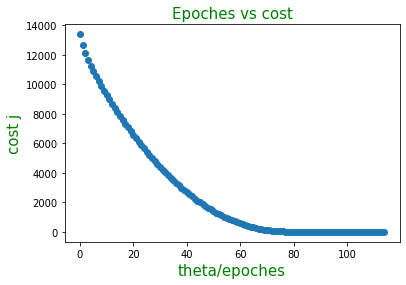

In [138]:
fig, ax = plt.subplots()
ax.plot(range(len(j)), j, linestyle = 'none', marker = 'o')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15})
ax.set_title('Epoches vs cost',color = 'g', fontdict={'size':15});

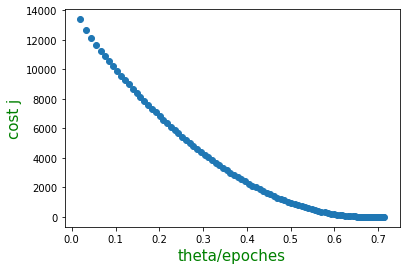

In [141]:
fig, ax = plt.subplots()
ax.plot(t3, j, linestyle = 'none', marker = 'o')
# ax2 = ax.twiny()
# ax2.plot(t0, j, color = 'r', linestyle = 'none', marker= 'x')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15});

In [156]:
x = np.column_stack((np.ones((25,1)), x_multi))
model = lambda t,x : t0 + t1 * x
y_pred = x @ t[-1]
r2_score(y_multi,y_pred)

0.9791534486801021

In [166]:
s = [2,3,4,2]
s[3:4]
25//6

4

## Adam start

In [208]:
# 1- momentum based GD Batch and single variable if we want multi we get n of features and change the dimes to n,1
def ADAM_mini_batch(x,y, alpha = .001, beta = .01,batch_size = 5, epsilon = .00000000000000000000001, epoches = 1000):
    m = x.shape[0]
    n = x.shape[1]
    theta = np.zeros((n+1,1))
    theta_hist = []
    # theta1_hist = []
    cost_hist = []
    vt = np.zeros((n+1,1))
    mt = np.zeros((n+1,1))
    x = np.column_stack((np.ones((m,1)), x))
    y = y.reshape(m,1)
    # print(x.shape)
    # print(theta.shape)
    c = 2
    # print(moment)
    for i in range(epoches):
        for p in range(m // batch_size + 1):
        # theta vector gradient section
        # print(((x @ theta)-y).shape)
        # grad_j_theta = (1/m) * (x.T @ ((x @ theta)-y))  #).reshape(n+1,1)
            x_batch = x[p * batch_size :(p* batch_size) + batch_size , :]
            y_batch = y[p * batch_size :(p* batch_size) + batch_size]
            grad_j_theta = (1/m) * np.sum(((x_batch @ theta)-y_batch) * x_batch, axis=0 ).reshape(n+1,1) 
            
            # cost = 1/(2*batch_size) * np.sum(np.square((x_batch @ theta) -y_batch)) 

            mt = mt * beta + (1-beta) * grad_j_theta
#         print(vtt.shape, grad.shape)
            vt = beta * vt + (1-beta)* (grad_j_theta**2)    ### NO.4
        
            theta = theta - (alpha/(np.sqrt(vt) + epsilon)) * mt



            # theta = theta - (alpha/(np.sqrt(vt) + epsilon)) * grad_j_theta # update step for rms prop
            # print(moment)
            # break
            #adding the results of the epoch
            if c == 1 or c == 0:
                print(vt)
            c += 1
        cost = 1/(2*m) * np.sum(np.square((x @ theta) - y)) # calculating cost on the whole batch
        theta_hist.append(theta) # appending the last theta in the epoches
        # theta1_hist.append(theta[1][0])
        cost_hist.append(cost)
        if i > 1:
            if abs(cost - cost_hist[-2]) < .0001:
                print('cost')
                print(cost_hist[-2])
                print(cost)
                print(i)
                break
            else:
                try:
                    if np.square(np.linalg.norm(grad_j_theta, ord= 2)) < 2:
                        
                        print('grad')
                        print(i)
                        break
                    # else:
                    #     print('##########')
                    #     print('moment is: ',moment)
                    #     print('cosst is:',cost)
                    #     print('gradient is:',grad_j_theta)
                except:
                    # print('***************')
                    # print('moment is: ',moment)
                    # print('cosst is:',cost)
                    # print('gradient is:',grad_j_theta)
                    pass 
            
    # return results to user
    print('final cost is:',cost)
    print('final gad is:',np.linalg.norm(grad_j_theta, ord= 2))
    return theta_hist, cost_hist


In [220]:
t,j = ADAM_mini_batch(x_multi,y_multi, alpha=.0915, beta = .006 , epoches= 10000)
t0 = [x[0] for x in t]
t1 = [x[1] for x in t]
t2 = [x[2] for x in t]
t3 = [x[3] for x in t]

grad
2
final cost is: 52.866602788151596
final gad is: 0.0


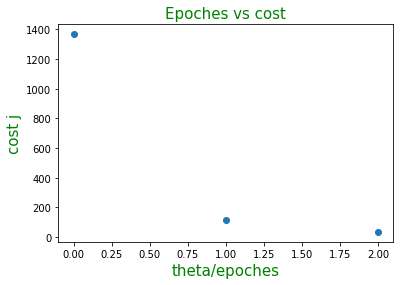

In [213]:
fig, ax = plt.subplots()
ax.plot(range(len(j)), j, linestyle = 'none', marker = 'o')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15})
ax.set_title('Epoches vs cost',color = 'g', fontdict={'size':15});

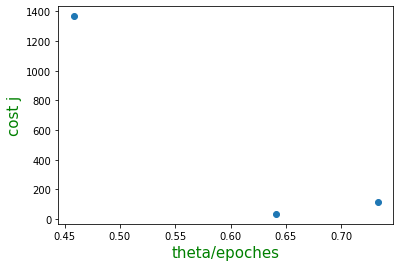

In [216]:
fig, ax = plt.subplots()
ax.plot(t2, j, linestyle = 'none', marker = 'o')
# ax2 = ax.twiny()
# ax2.plot(t0, j, color = 'r', linestyle = 'none', marker= 'x')
ax.set_xlabel('theta/epoches',color = 'g', fontdict={'size':15})
ax.set_ylabel('cost j', color = 'g', fontdict={'size':15});

In [ ]:
x = np.column_stack((np.ones((25,1)), x_multi))
model = lambda t,x : t0 + t1 * x
y_pred = x @ t[-1]
r2_score(y_multi,y_pred)

## End of working on ADAM new

In [ ]:
def RMS(x,y,alpha , beta, epoches = 1000000):
    
    m = len(x)
    y = y.reshape((len(y),1))
    h_theta = lambda x,theta : x @ theta.reshape((2,1))
    error_vector = lambda h , y : h-y
    j_theta = lambda m, error : 1/(2*m) * np.square(np.linalg.norm(error, ord= 2))
    
    gradeient = lambda m, error, x: np.dot(x.T , error) * (1/m)
    
    x0 = np.ones(shape=(len(y),1))
    x = np.c_[x0,x]

    theta = []
    cost = []
    vt = []
    temp = 0
    
    for i in range(epoches):
        if i == 0:
            theta_old = np.zeros((2,1)) 
            vtt = np.zeros((2,1))      
        else:
            theta_old = theta[-1]
            vtt = vt[-1]                         ### No.1
                                    
       
        h = h_theta(x,theta_old)               #### NO.2            
#         if i > 2:
#             print(h)
#             return
        error = error_vector(h,y) 
        j = j_theta(m,error)
        grad = gradeient(m,error,x)   ### NO.3
        
#         print(vtt.shape, grad.shape)
        vtt = beta * vtt + (1-beta)* (grad**2)    ### NO.4
        
        theta_new = theta_old - (alpha/np.sqrt(vtt)) * grad
      
        
#         print('y',y.shape)
#         print('h',h.shape)
#         print('erro',error.shape)
#         print('x',x.shape)
#         print('grad',grad.shape)
        
        
        cost.append(j)
        theta.append(theta_new)
        vt.append(vtt)
        
        if i > 1:
            if abs(cost[-1] - cost[-2]) < .00000001:
                print(i)
                break
            elif np.square(np.linalg.norm(grad,ord = 2)) < .000001:
                print(i)
                print("from grad condition")
                break
#         if counter == 1:
#             break
        
#         counter +=1
        
    return cost, theta



a = -2
b = 1
x1 = np.linspace(0,20,50)
np.random.shuffle(x1)
y1 = -1* x1 + 2

In [167]:
def ADAM(x,y,alpha , beta, epoches = 1000000):
    
    m = len(x)
    y = y.reshape((len(y),1))
    h_theta = lambda x,theta : x @ theta.reshape((2,1))
    error_vector = lambda h , y : h-y
    j_theta = lambda m, error : 1/(2*m) * np.square(np.linalg.norm(error, ord= 2))
    
    gradeient = lambda m, error, x: np.dot(x.T , error) * (1/m)
    
    x0 = np.ones(shape=(len(y),1))
    x = np.c_[x0,x]

    theta = []
    cost = []
    vt = []
    mt = np.zeros((2,1))
    
    for i in range(epoches):
        if i == 0:
            theta_old = np.zeros((2,1)) 
            vtt = np.zeros((2,1))      
        else:
            theta_old = theta[-1]
            vtt = vt[-1]                         ### No.1
                                    
       
        h = h_theta(x,theta_old)               #### NO.2            
#         if i > 2:
#             print(h)
#             return
        error = error_vector(h,y) 
        j = j_theta(m,error)
        grad = gradeient(m,error,x)   ### NO.3
        
        mt = mt * beta + (1-beta) * grad
        
        
#         print(vtt.shape, grad.shape)
        vtt = beta * vtt + (1-beta)* (grad**2)    ### NO.4
        
        theta_new = theta_old - (alpha/np.sqrt(vtt)) * mt
      
        
#         print('y',y.shape)
#         print('h',h.shape)
#         print('erro',error.shape)
#         print('x',x.shape)
#         print('grad',grad.shape)
        
        
        cost.append(j)
        theta.append(theta_new)
        vt.append(vtt)
        
        if i > 1:
            if abs(cost[-1] - cost[-2]) < .00000001:
                print(i)
                break
            elif np.square(np.linalg.norm(grad,ord = 2)) < .000001:
                print(i)
                print("from grad condition")
                break
#         if counter == 1:
#             break
        
#         counter +=1
        
    return cost, theta



a = -2
b = 1
x1 = np.linspace(0,20,50)
np.random.shuffle(x1)
y1 = -1* x1 + 2

In [ ]:
############## single variable minibatch Gradient ########################
def miniBatchGradient(x,y,alpha, epochs = 1000, batch_size = 5):
    theta0 = []
    theta1 = []
    j = []
    n_epochs = []
    
    m = len(x)
    h_theta = lambda theta0, theta1, x: theta0 + theta1 * x
    j_theta = lambda b,y_hat,y: 1/(2*b) * sum((y_hat - y)**2)
    grad_theta0 = lambda b, y_hat, y: 1/b * sum(y_hat - y)
    grad_theta1 = lambda b, y_hat, y, x: 1/b * sum((y_hat - y) * x)

    for i in range(epochs):
        for l in range(m // batch_size + 1):
            if i == 0:
                theta1_old = 0
                theta0_old = 0
            else:
                theta1_old = theta1[-1]
                theta0_old = theta0[-1]

            h = h_theta(theta0_old,theta1_old, x[l*batch_size:(l*batch_size)+batch_size])
            cost = j_theta(batch_size,h,y[l*batch_size:(l*batch_size)+batch_size])

            grad0 = grad_theta0(batch_size, h, y[l*batch_size:(l*batch_size)+batch_size])
            grad1 = grad_theta1(batch_size,h,y[l*batch_size:(l*batch_size)+batch_size],x[l*batch_size:(l*batch_size)+batch_size])

            theta1_new = theta1_old - alpha * grad1
            theta0_new = theta0_old - alpha * grad0
            
            
            theta0.append(theta0_new)
            theta1.append(theta1_new)        
            j.append(cost)
            #n_epochs.append(l)
    
        #stop condition  
        if i >1:

            if np.abs(j[-1] - j[-i*batch_size]) < .0001:
                print('hi..1')
                print(i)
                break
            elif np.abs(np.sqrt(theta0_new**2 + theta1_new **2 ) - np.sqrt(theta0_old** 2 + theta1_old **2)) < .0001:
                print('hi..2')
                print(i)
                break
                    

    return theta0, theta1 , j, n_epochs


    